# Project Brief
## Image Classification
In this project, you'll classify images from the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). The dataset consists of airplanes, dogs, cats, and other objects.

You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded. You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers. At the end, you'll get to see your neural network's predictions on the sample images. 

# Solution

## Importing Libraries

In [1]:
import keras
import keras.models
from keras.datasets import cifar10

Using TensorFlow backend.


## Download and explore data

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
labels = [ 'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck']
for i in range(len(labels)):
  print(str(i)+" : "+labels[i])

0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck


In [0]:
X_train=X_train/255
X_test=X_test/255

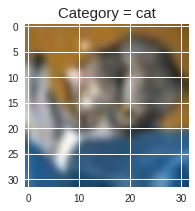

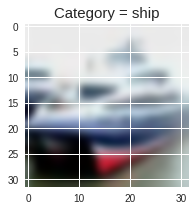

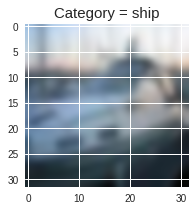

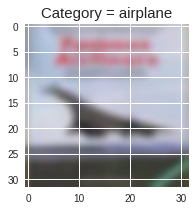

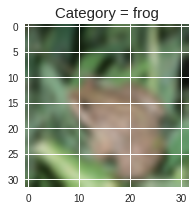

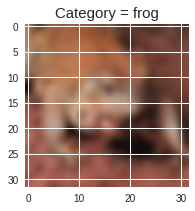

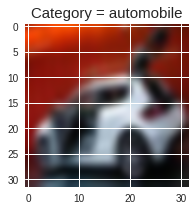

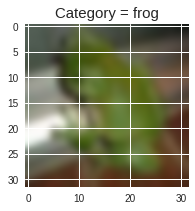

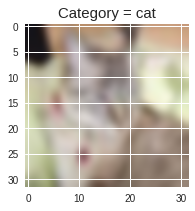

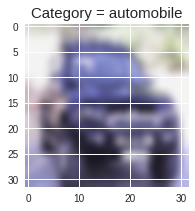

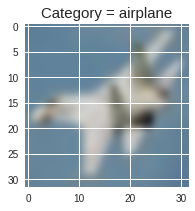

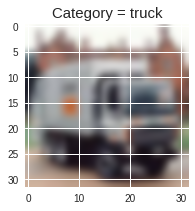

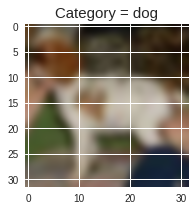

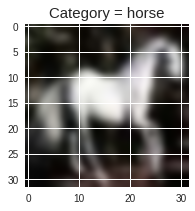

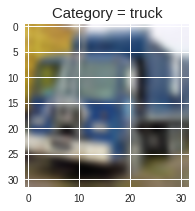

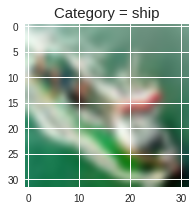

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline
def  plot_CIFAR(ind):
    # Take the image arr
    arr = X_test[ind]
 
    img = arr
    #set labels to show as title
    title = labels[y_test[ind][0]]
    #set figure
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    #show image
    ax.imshow(img,interpolation='bicubic')
    #set Title
    ax.set_title('Category = '+ title,fontsize =15)
    
for i in range(16) :
    plot_CIFAR(i)

## Data Preprocessing

In [0]:
from keras.utils import to_categorical
#one hot encoding of target labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Defining Model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
#import tensorflow as tf

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',activation='relu',input_shape=X_train.shape[1:]))
#model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
#add output layer
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

## Executing the Model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator
#data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)
batch_size =128
epochs = 40
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    samples_per_epoch = 8000,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=40, validation_data=(array([[[..., steps_per_epoch=62)`


Epoch 1/40
62/62 [==============================] - 8s 122ms/step - loss: 2.0684 - acc: 0.2277 - val_loss: 1.8445 - val_acc: 0.3202
Epoch 2/40
62/62 [==============================] - 5s 82ms/step - loss: 1.7743 - acc: 0.3407 - val_loss: 1.5940 - val_acc: 0.4250
Epoch 3/40
62/62 [==============================] - 5s 81ms/step - loss: 1.6606 - acc: 0.3852 - val_loss: 1.5205 - val_acc: 0.4462
Epoch 4/40
62/62 [==============================] - 5s 83ms/step - loss: 1.5692 - acc: 0.4230 - val_loss: 1.3986 - val_acc: 0.4905
Epoch 5/40
62/62 [==============================] - 5s 83ms/step - loss: 1.5139 - acc: 0.4530 - val_loss: 1.3485 - val_acc: 0.5098
Epoch 6/40
62/62 [==============================] - 5s 82ms/step - loss: 1.4588 - acc: 0.4810 - val_loss: 1.3543 - val_acc: 0.4974
Epoch 7/40
62/62 [==============================] - 5s 82ms/step - loss: 1.3832 - acc: 0.4956 - val_loss: 1.2398 - val_acc: 0.5555
Epoch 8/40
62/62 [==============================] - 5s 82ms/step - loss: 1.3532 - 

## Evaluate the model

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 138us/step


In [13]:
print('Test accuracy:', test_acc)

Test accuracy: 0.7166
